# ISE390 
## Assignment 3
##  Due: May 16th at 11:59 pm


The goal of this assignment is to practice different clustering methods discussed in the class and visualize the clusters for N-dimensional data.

Visit this [page](https://www.mathworks.com/help/bioinfo/examples/gene-expression-profile-analysis.html) in which analysis of gene expression data is described in details.

You can download the data from the same page; The data are in .mat format but you can easily read them in Python using the proper methods developed for reading mat files.

You should write a script in Python (.ipynb) and use the scikit-learn to regenerate the following figures.

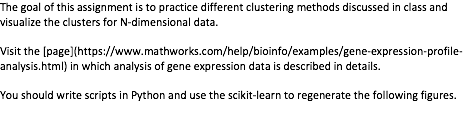

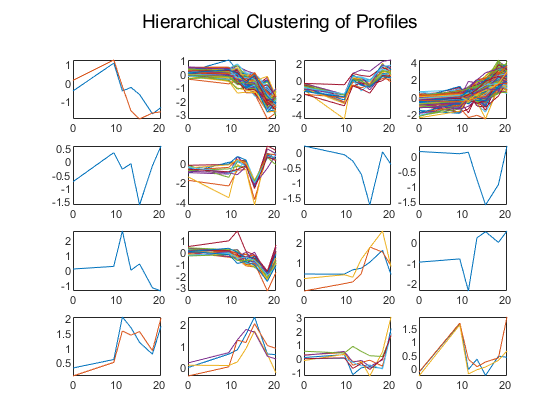

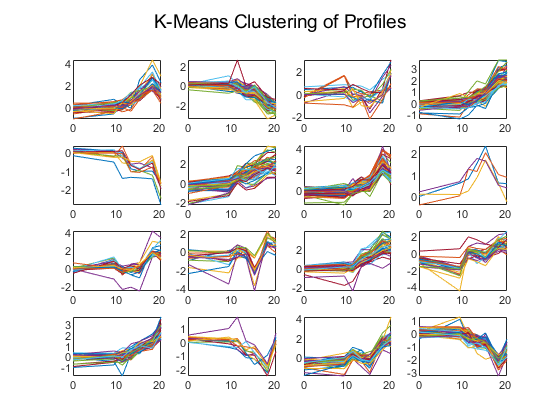

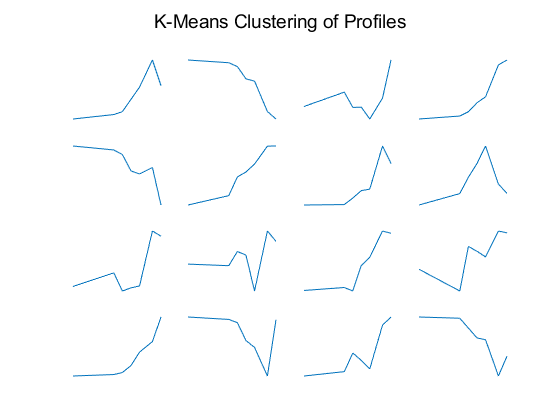

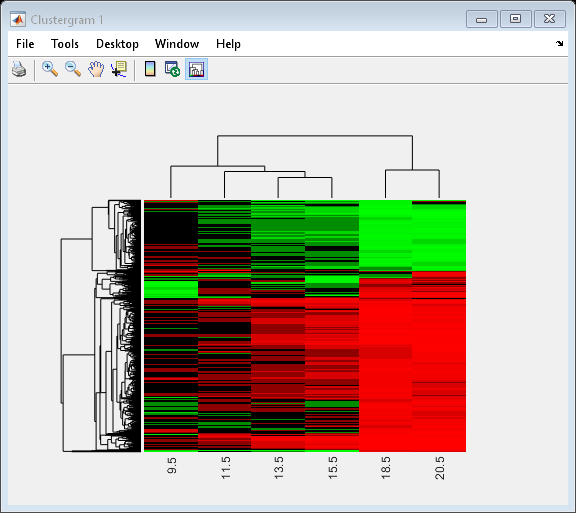

In [119]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance as dist
from scipy.cluster import hierarchy as hie
from sklearn.cluster import KMeans
import seaborn as sns

mat = scipy.io.loadmat('yeastdata.mat')
genes = pd.DataFrame(mat['genes'])
times = mat['times']
yeast = pd.DataFrame(mat['yeastvalues'])

In [120]:
times = times.reshape(7)

In [121]:
indices = genes.index[genes[0] == 'EMPTY'].tolist()
yeast.drop(indices, inplace=True)
genes.drop(indices, inplace=True)
genes.dropna()
yeast = yeast.replace([np.inf, -np.inf], np.nan)
yeast = yeast.dropna()

In [122]:
corrDist = dist.pdist(yeast, 'correlation')
clusterTree = hie.linkage(corrDist, method='average')

In [141]:
km = KMeans(n_clusters=17)
fit = km.fit_predict(clusterTree)
labels = km.labels_

In [142]:
yeastT = yeast.transpose()

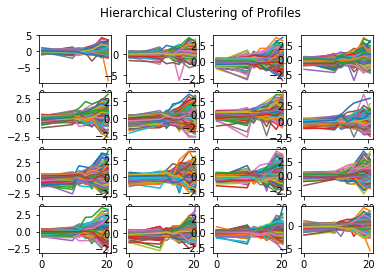

In [143]:
plt.suptitle('Hierarchical Clustering of Profiles')
for i in range(1, 17):
    plt.subplot(4,4,i)
    plt.plot(times, yeastT.iloc[:, labels == i])
plt.show()

In [144]:
km = KMeans(n_clusters=17)
fit = km.fit_predict(yeast)
centers = km.cluster_centers_

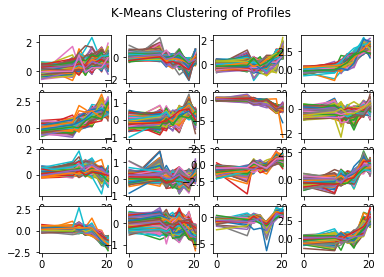

In [145]:
plt.suptitle('K-Means Clustering of Profiles')
for i in range(1, 17):
    plt.subplot(4,4,i);
    plt.plot(times, yeastT.iloc[:, fit == i])

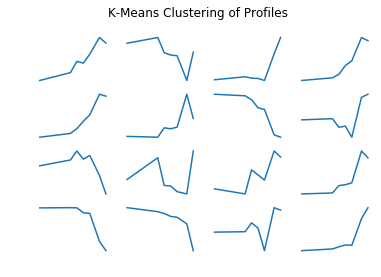

In [146]:
for i in range(1, 17):
    plt.subplot(4,4,i);
    plt.plot(times, centers[i, :])
    plt.axis('off')
plt.suptitle('K-Means Clustering of Profiles')
plt.show()

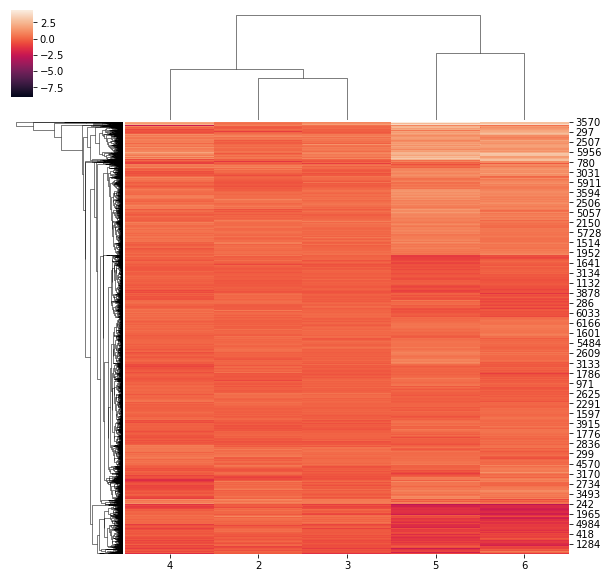

In [128]:
g = sns.clustermap(yeast.iloc[:, 2:])